In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d iamhungundji/dysarthria-detection
!unzip *.zip

In [5]:
data = pd.read_csv("/content/torgo_data/data.csv")
print(data.shape)

(2000, 3)


In [ ]:
dir_ = "../input/dysarthria-detection/"

data['filename'] = dir_ + data['filename']

In [6]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


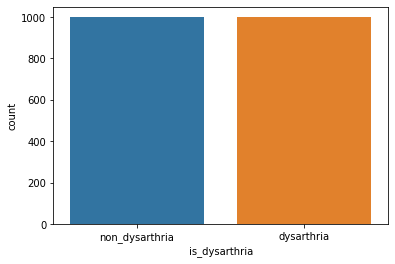

In [7]:
sns.countplot(x=data['is_dysarthria'])

## **Defining functions for various plots**

In [8]:
#Waveplot
def get_waveplot(path, target, gender):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20,5))
    librosa.display.waveshow(x, sr=sr)
    plt.title("Target: " + target + " " + "Gender: " + gender)
    plt.show()

In [9]:
#Mel-Frequency Cepstral Coefficient -> 128 coeffs
def get_mfcc(path, target, gender):
    x, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
    print(mfccs.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title('MFCC of '+ target + " " + gender)
    plt.show()

In [10]:
#Mel-Spectrogram -> 128 bands
def get_melspec(path, target, gender):
    x, sr = librosa.load(path)
    melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
    print(melspec.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(melspec, sr=sr, x_axis='time')
    plt.title('Mel Spectrogram of '+ target + ' ' + gender)
    plt.show()

## **Visualizing Waveplots**

**Speech of a male with no dysarthria**

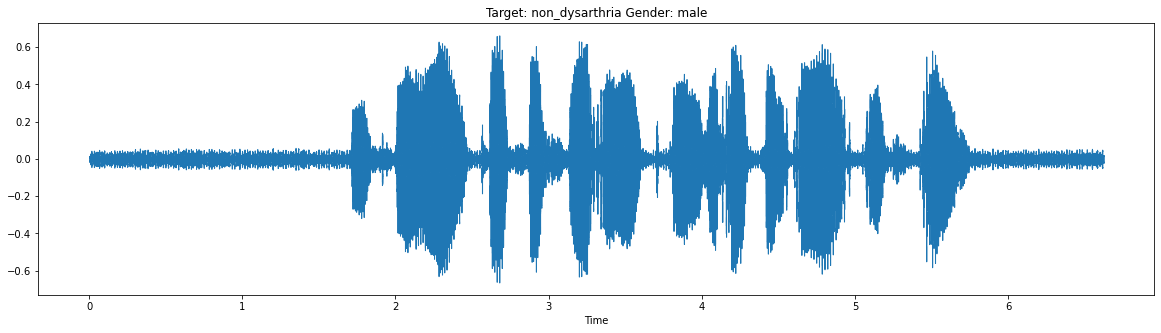

In [11]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='male')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Male with dysarthria**

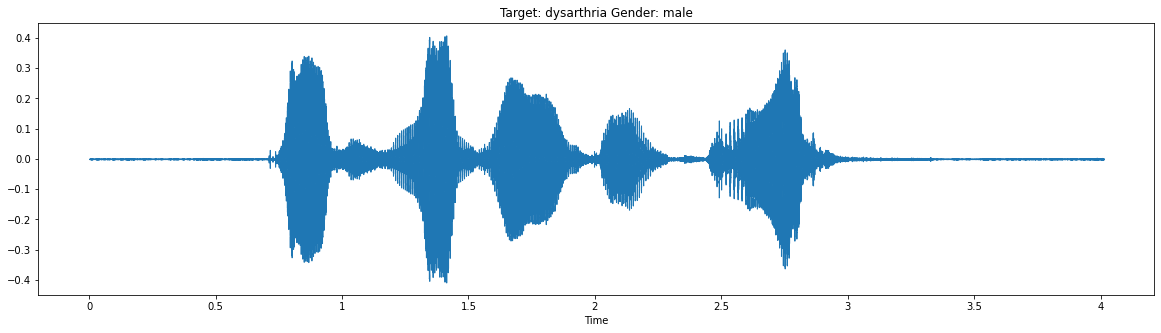

In [12]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='male')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Female with no dysarthria**

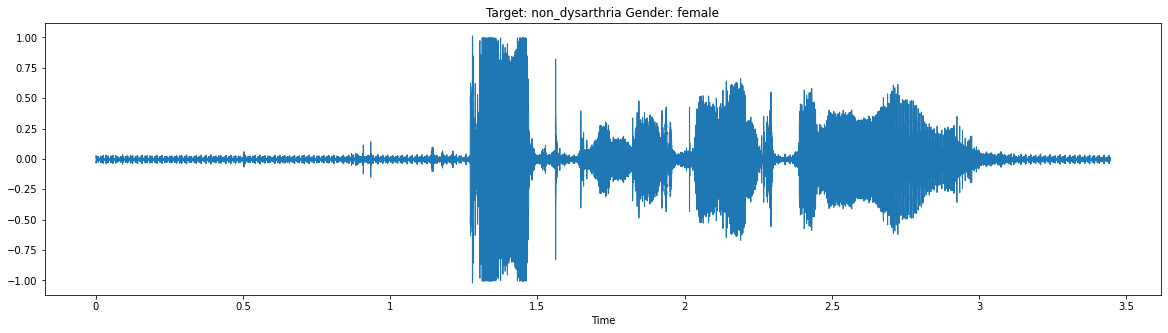

In [13]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='female')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Female with dysarthria**

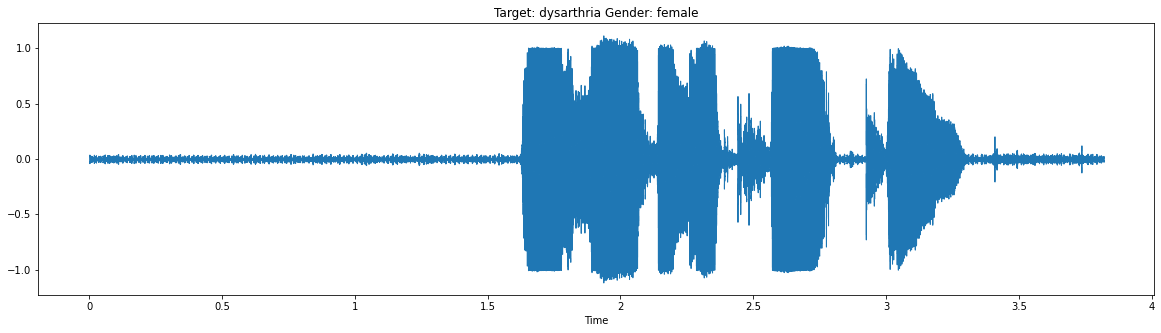

In [14]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='female')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

## **Visualizing MFCC features**

(128, 165)


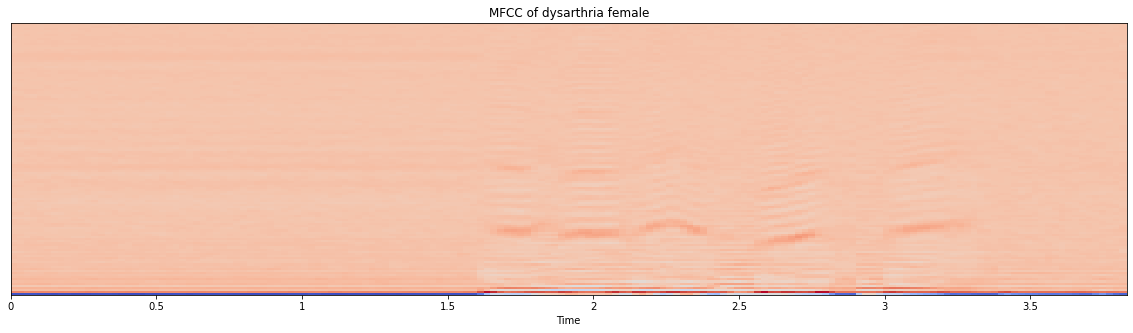

(128, 173)


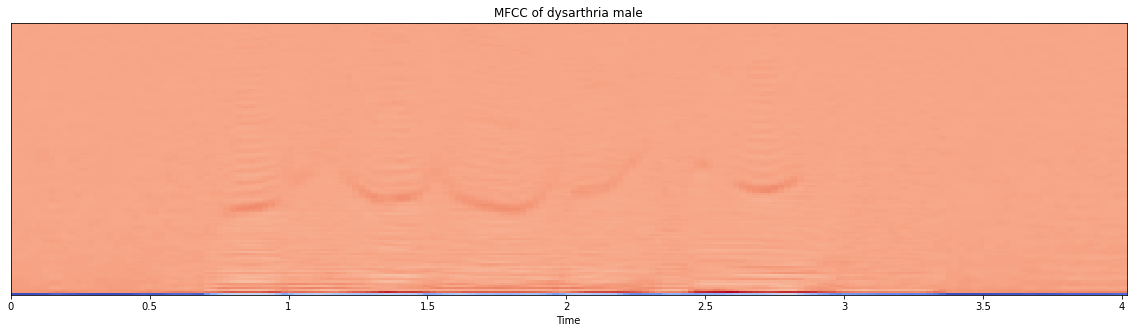

(128, 149)


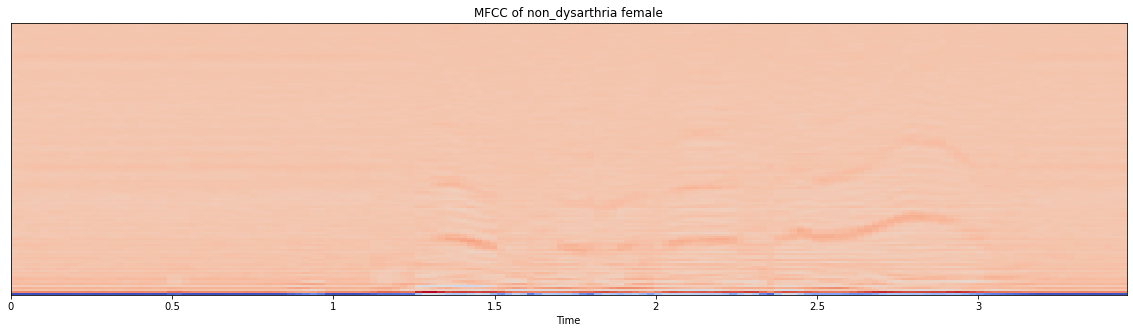

(128, 286)


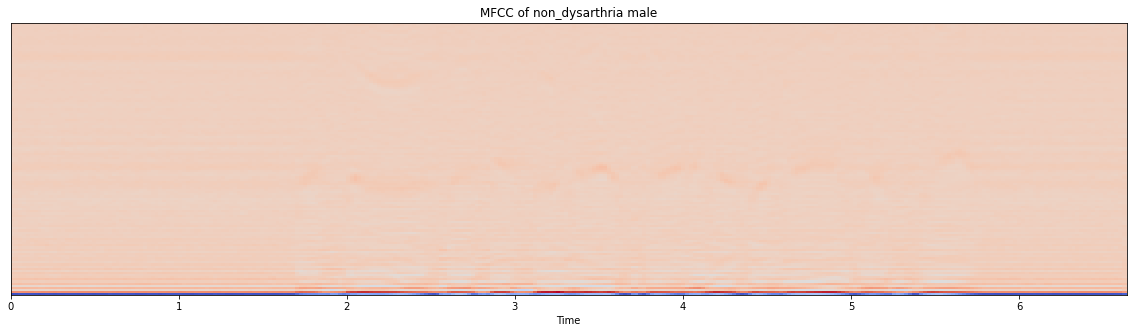

In [15]:
for i in np.unique(data['is_dysarthria']):
    for j in np.unique(data['gender']):
        sample = data[(data['is_dysarthria']==i) & (data['gender']==j)] 
        get_mfcc(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])

## **Visualizing Mel-Spectograms**

(128, 165)


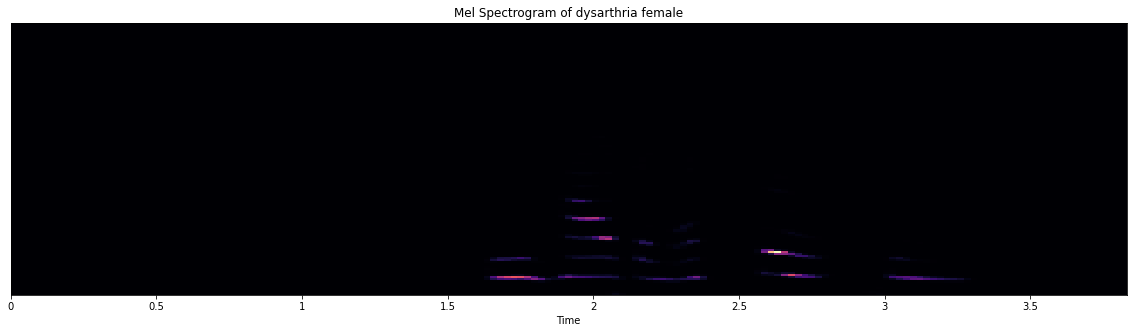

(128, 173)


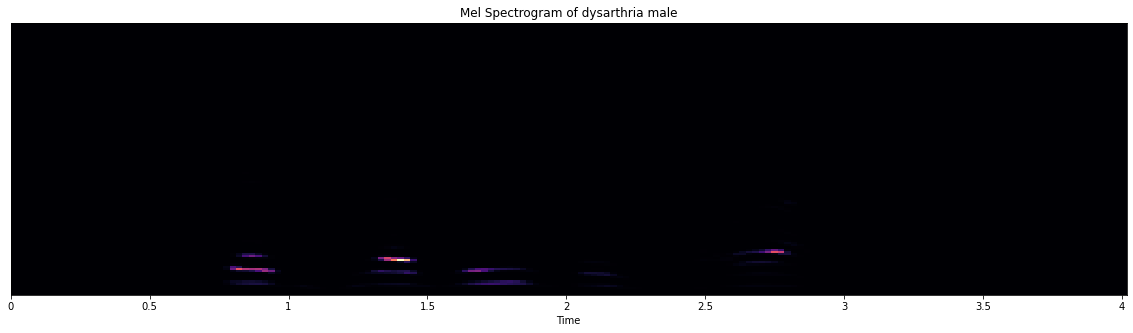

(128, 149)


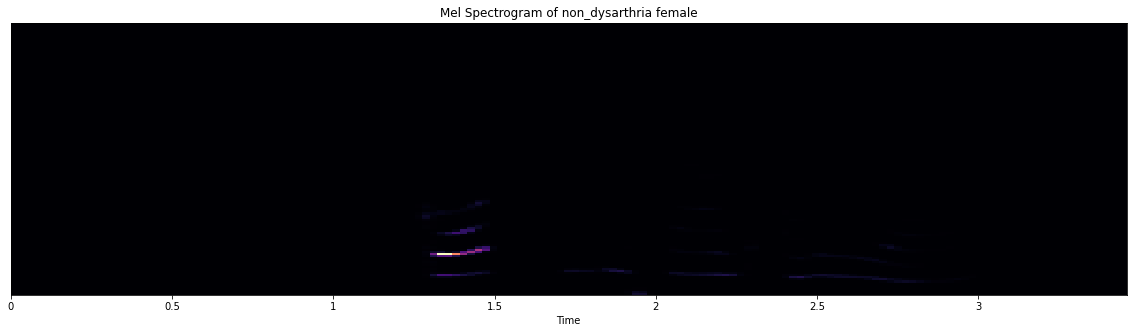

(128, 286)


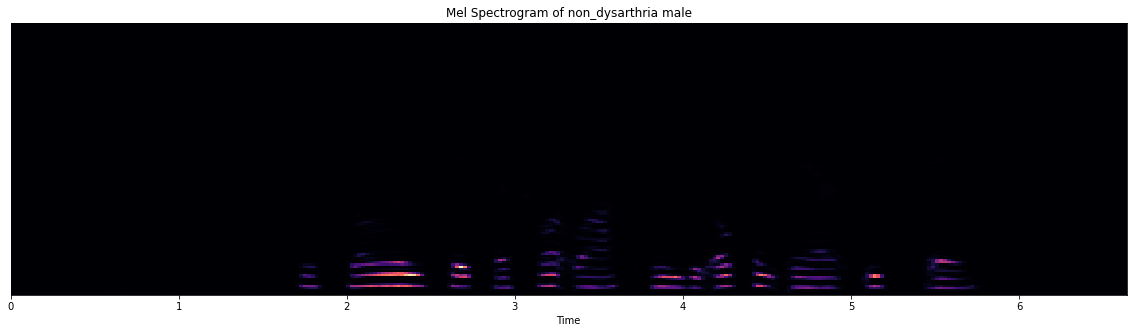

In [16]:
for i in np.unique(data['is_dysarthria']):
    for j in np.unique(data['gender']):
        sample = data[(data['is_dysarthria']==i) & (data['gender']==j)] 
        get_melspec(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])

**Observation:**

Dysarthric samples - the visualization plots have much more darker and has repetitive patterns indicating the slurs present in the speech. 

Non dysarthric samples - have a more spread out visualization. 

## **Extracting MFCC features**

**Maximum 128 MFCCs can be extracted**

In [17]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x, sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T, axis=0)
    except:
        print("Error in audio")
    return mfccs

In [18]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [19]:
X_df = pd.DataFrame(data['filename'].progress_apply(lambda x: create_mfcc_features(x)).tolist())

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


In [20]:
X= X_df.copy()

## **Data Preparation**

In [21]:
X_df.loc[pd.isnull(X_df).any(1), :].index.values

array([600])

In [22]:
X_df = X_df.dropna()
print(X_df.shape)
X_df.head()

(1999, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [23]:
encoder = LabelEncoder()
y = encoder.fit_transform(data['is_dysarthria'])
y = np.delete (y, 600)
y.shape

(1999,)

In [24]:
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)
x_train.shape, x_val.shape, x_test.shape

((1619, 128), (200, 128), (180, 128))

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(x_train)
X_val = sc.transform(x_val)
X_test = sc.transform(x_test)

In [26]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_val = X_val.reshape(X_val.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)

## **CNN Model**

In [27]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 1, 8)          0

**Model 1 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.9, Beta 2 = 0.999)**

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
callback_ = EarlyStopping(monitor='val_loss', patience=3)
metrics = [tf.keras.metrics.Recall()]
adam1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [30]:
model.compile(optimizer= adam1, loss='binary_crossentropy', metrics=metrics)

In [31]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/100
51/51 [==============================] - 2s 14ms/step - loss: 0.6372 - recall: 0.5342 - val_loss: 0.5235 - val_recall: 0.7921
Epoch 2/100
51/51 [==============================] - 0s 8ms/step - loss: 0.5283 - recall: 0.7640 - val_loss: 0.4218 - val_recall: 0.8317
Epoch 3/100
51/51 [==============================] - 0s 9ms/step - loss: 0.4518 - recall: 0.8149 - val_loss: 0.3571 - val_recall: 0.8713
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3635 - recall: 0.8708 - val_loss: 0.2849 - val_recall: 0.9703
Epoch 5/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3106 - recall: 0.8994 - val_loss: 0.2023 - val_recall: 0.9604
Epoch 6/100
51/51 [==============================] - 0s 8ms/step - loss: 0.2483 - recall: 0.9193 - val_loss: 0.1546 - val_recall: 0.9406
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.2018 - recall: 0.9292 - val_loss: 0.1107 - val_recall: 0.9505
Epoch 8/100
51/51 [=====================

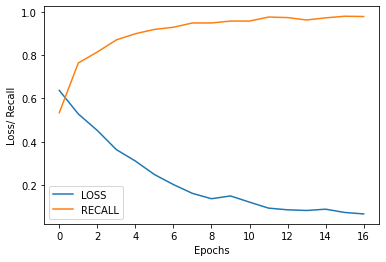

In [32]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [33]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])

6/6 [==============================] - 0s 4ms/step - loss: 0.0217 - recall: 1.0000
Validation Loss:  0.021699316799640656
6/6 [==============================] - 0s 3ms/step - loss: 0.0217 - recall: 1.0000
Validation Recall:  1.0


In [34]:
y_pred = model.predict(X_test)

y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred = y_pred.astype("int")
y_pred = encoder.inverse_transform(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


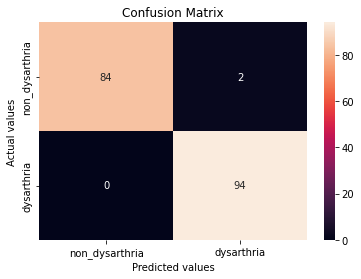

In [35]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [36]:
print("F1-score of model 1: ", f1_score((y_test), encoder.transform(y_pred)))

F1-score of model 1:  0.9894736842105264


**Model 2 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.6, Beta 2 = 0.77)**

In [37]:
adam2 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.9)

In [38]:
model.compile(optimizer=adam2, loss='binary_crossentropy', metrics=metrics)

In [39]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/500
51/51 [==============================] - 1s 13ms/step - loss: 0.0706 - recall: 0.9789 - val_loss: 0.0373 - val_recall: 0.9802
Epoch 2/500
51/51 [==============================] - 0s 9ms/step - loss: 0.0525 - recall: 0.9863 - val_loss: 0.0334 - val_recall: 0.9901
Epoch 3/500
51/51 [==============================] - 0s 8ms/step - loss: 0.0467 - recall: 0.9888 - val_loss: 0.0334 - val_recall: 0.9901
Epoch 4/500
51/51 [==============================] - 0s 9ms/step - loss: 0.0476 - recall: 0.9826 - val_loss: 0.0314 - val_recall: 0.9901
Epoch 5/500
51/51 [==============================] - 0s 8ms/step - loss: 0.0400 - recall: 0.9913 - val_loss: 0.0332 - val_recall: 0.9802
Epoch 6/500
51/51 [==============================] - 0s 9ms/step - loss: 0.0447 - recall: 0.9901 - val_loss: 0.0345 - val_recall: 0.9802
Epoch 7/500
51/51 [==============================] - 0s 8ms/step - loss: 0.0465 - recall: 0.9814 - val_loss: 0.0485 - val_recall: 0.9802


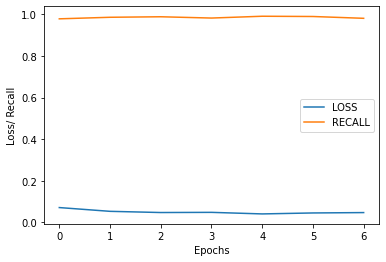

In [40]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [41]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0126 - recall: 1.0000
Validation Loss:  0.012564144097268581
6/6 [==============================] - 0s 3ms/step - loss: 0.0126 - recall: 1.0000
Validation Recall:  1.0
6/6 [==============================] - 0s 3ms/step - loss: 0.0126 - recall: 1.0000


[0.012564144097268581, 1.0]

In [42]:
y_pred2 = model.predict(X_test)

y_pred2[y_pred2>=0.5] = 1
y_pred2[y_pred2<0.5] = 0
y_pred2 = y_pred2.astype("int")
y_pred2 = encoder.inverse_transform(y_pred2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


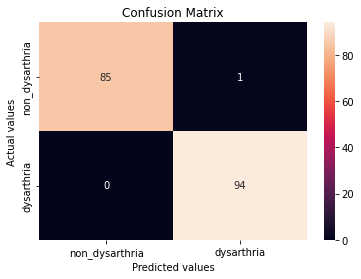

In [43]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred2)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [44]:
print("F1-score of model 2: ", f1_score((y_test), encoder.transform(y_pred2)))

F1-score of model 2:  0.9947089947089947


**Model 3 (Adam Optimizer - Learning Rate = 0.01, Beta 1 = 0.9, Beta 2 = 0.999)**

In [45]:
adam3 = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

In [46]:
model.compile(optimizer=adam3, loss='binary_crossentropy', metrics=metrics)

In [47]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/500
51/51 [==============================] - 1s 12ms/step - loss: 0.6605 - recall: 0.8009 - val_loss: 0.2678 - val_recall: 0.9406
Epoch 2/500
51/51 [==============================] - 0s 8ms/step - loss: 0.3339 - recall: 0.7851 - val_loss: 0.2380 - val_recall: 0.8218
Epoch 3/500
51/51 [==============================] - 0s 9ms/step - loss: 0.3027 - recall: 0.8211 - val_loss: 0.1852 - val_recall: 0.9208
Epoch 4/500
51/51 [==============================] - 0s 8ms/step - loss: 0.2977 - recall: 0.7963 - val_loss: 0.1671 - val_recall: 0.9406
Epoch 5/500
51/51 [==============================] - 0s 8ms/step - loss: 0.2114 - recall: 0.8708 - val_loss: 0.1179 - val_recall: 0.9505
Epoch 6/500
51/51 [==============================] - 0s 8ms/step - loss: 0.1752 - recall: 0.8820 - val_loss: 0.1341 - val_recall: 0.9505
Epoch 7/500
51/51 [==============================] - 0s 9ms/step - loss: 0.1990 - recall: 0.8857 - val_loss: 0.1329 - val_recall: 0.9802
Epoch 8/500
51/51 [=====================

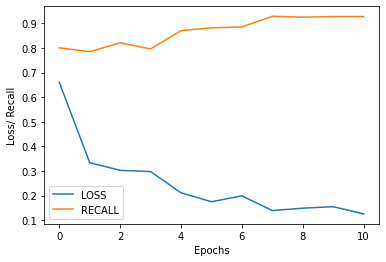

In [48]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [49]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - recall: 0.9787
Validation Loss:  0.06684532761573792
6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - recall: 0.9787
Validation Recall:  0.978723406791687
6/6 [==============================] - 0s 3ms/step - loss: 0.0668 - recall: 0.9787


[0.06684532761573792, 0.978723406791687]

In [50]:
y_pred3 = model.predict(X_test)

y_pred3[y_pred3>=0.5] = 1
y_pred3[y_pred3<0.5] = 0
y_pred3 = y_pred3.astype("int")
y_pred3 = encoder.inverse_transform(y_pred3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


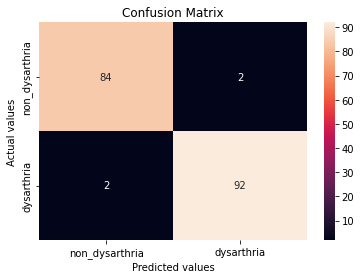

In [51]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred3)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [52]:
print("F1-score of model 3: ", f1_score((y_test), encoder.transform(y_pred3)))

F1-score of model 3:  0.9787234042553191


**Comparison of the 3 models:**

We can see that when the values of beta_1 and beta_2 are reduced in model 2 and the value of learning rate is kept constant, the number of training steps reduce drastically. Model 2 gives increased number of false positives. 

When the beta values are kept same as model 1 and the value of learning rate is increased, we again see a decrease in epochs relative to the first model (faster learning). False positives increase in model 3. 

Conclusion: Best model is model 1 (Small learning rate and beta values close to 1) 